In [25]:
# Step 1: Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2  # For L2 regularization

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
# Step 2: Define directories for training and validation datasets
DATASET_PATH = '/kaggle/input/dogs-vs-cats/train'  # Dataset path in Kaggle
TEST_PATH = '/kaggle/input/dogs-vs-cats/test'  # Adjust if necessary


In [28]:
# Step 3: Set parameters
IMG_SIZE = (128, 128)  # Resize images to reduce computation
BATCH_SIZE = 16
EPOCHS = 10

In [29]:
# Step 4: Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [30]:
# Step 5: Define the CNN Model with regularization and dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    
    Dense(1, activation='sigmoid')  # Binary classification
])


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,489 (466.75 KB)

 Trainable params: 118,785 (464.00 KB)

 Non-trainable params: 704 (2.75 KB)

In [32]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [33]:
# Step 6: Compile the Model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Import necessary modules
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # Path to save the best model
    monitor='val_loss',       # Metric to monitor
    save_best_only=True,      # Save only the best model
    verbose=1                 # Display updates
)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=5,               # Stop after 5 epochs with no improvement
    verbose=1                 # Display updates
)

In [35]:
# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5686 - loss: 1.0548
Epoch 1: val_loss improved from inf to 0.89426, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 93ms/step - accuracy: 0.5686 - loss: 1.0546 - val_accuracy: 0.5690 - val_loss: 0.8943
Epoch 2/10
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6109 - loss: 0.8542
Epoch 2: val_loss improved from 0.89426 to 0.79918, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.6110 - loss: 0.8541 - val_accuracy: 0.6134 - val_loss: 0.7992
Epoch 3/10
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6583 - loss: 0.7318
Epoch 3: val_loss did not improve from 0.79918
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 92ms/step - accuracy: 0.6583 - loss: 0.7317 - val_accuracy: 0.5662 - val_loss: 0.8852
Epoch 4/10
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6865 - loss: 0.6648
Epoch 4: val_loss improved from 0.79918 to 0.70171, saving model 

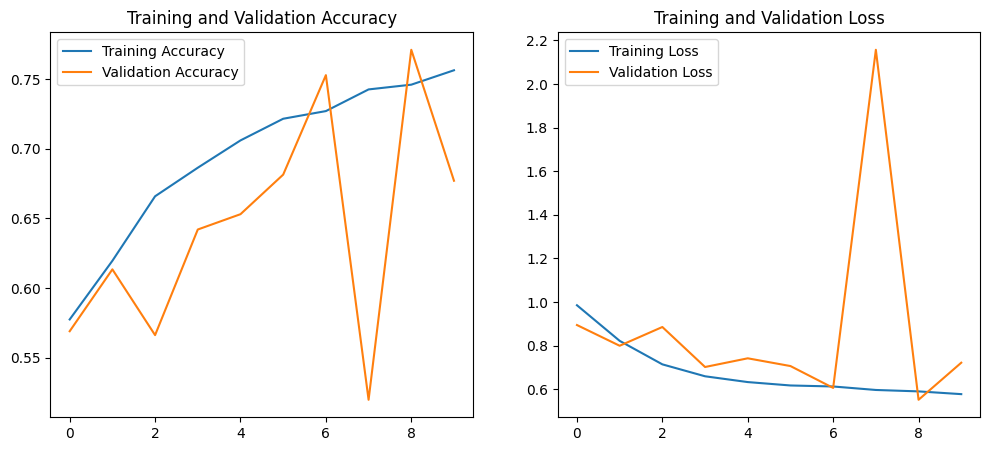

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt
# Step 5: Visualize Training Performance
def plot_training_results(history):
    epochs = range(len(history.history['accuracy']))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot
plot_training_results(history)


In [37]:
# Save final model
model.save('/kaggle/working/dog_vs_cat_model.keras')

In [38]:
# Access the history object
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Print each epoch's results
for epoch in range(len(training_loss)):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Loss: {training_loss[epoch]:.4f}, Training Accuracy: {training_accuracy[epoch]:.4f}")
    print(f"  Validation Loss: {validation_loss[epoch]:.4f}, Validation Accuracy: {validation_accuracy[epoch]:.4f}")
    print()


Epoch 1:
  Training Loss: 0.9850, Training Accuracy: 0.5774
  Validation Loss: 0.8943, Validation Accuracy: 0.5690

Epoch 2:
  Training Loss: 0.8217, Training Accuracy: 0.6195
  Validation Loss: 0.7992, Validation Accuracy: 0.6134

Epoch 3:
  Training Loss: 0.7139, Training Accuracy: 0.6658
  Validation Loss: 0.8852, Validation Accuracy: 0.5662

Epoch 4:
  Training Loss: 0.6591, Training Accuracy: 0.6863
  Validation Loss: 0.7017, Validation Accuracy: 0.6420

Epoch 5:
  Training Loss: 0.6325, Training Accuracy: 0.7060
  Validation Loss: 0.7416, Validation Accuracy: 0.6530

Epoch 6:
  Training Loss: 0.6170, Training Accuracy: 0.7215
  Validation Loss: 0.7060, Validation Accuracy: 0.6814

Epoch 7:
  Training Loss: 0.6123, Training Accuracy: 0.7270
  Validation Loss: 0.6058, Validation Accuracy: 0.7528

Epoch 8:
  Training Loss: 0.5963, Training Accuracy: 0.7426
  Validation Loss: 2.1572, Validation Accuracy: 0.5198

Epoch 9:
  Training Loss: 0.5898, Training Accuracy: 0.7459
  Validation